> ## Log transformations
- 데이터의 분포가 극단적으로 모였을때
- 선형 모델은 데이터가 정규분포때 적합
- Poission -> Normal distribution
- 로그인 카운트, 제품 판매량, 검색 단어, 친구
- np.log or np.exp 등의 함수 사용

### 이유 
- 데이터 분석을 하기 위해 log를 취하는 이유는 한마디로 <b>정규성을 높이고 분석(회귀분석 등)에서 정확한 값을 얻기 위함</b>이다. 
- 큰 수를 작게 만들 경우 사용
- 복잡한 계산을 간편하게 위할 경우 사용
> <br>[큰수를 작게 만들 경우]
예를 들어, 100=10^2 이다. 100에 상용로그를 취한다면 100을 10을 밑으로 하는 지수가 있는 값의 그 지수로 나타낸다. 
그래서 100에 상용로그를 취하면 2가 된다.
<br><br>
[복잡한 계산을 간편하게 만들 경우]
log10 또한 로그를 취하면 로그의 성질에 의해 곱하기가 더하기로, 나누기가 빼기로 바뀐다. <br><br>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [8]:
rnd = np.random.RandomState(0)
X_org = rnd.normal(size=(1000, 3))
w = rnd.normal(size=3)

X = rnd.poisson(10 * np.exp(X_org))
y = np.dot(X_org, w)

Text(0.5, 0, 'Value')

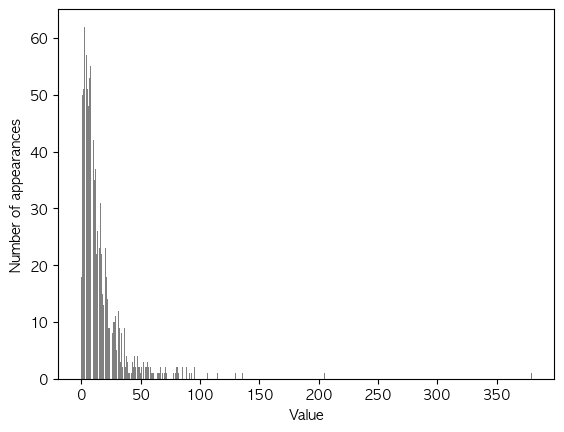

In [27]:
bins = np.bincount(X[:, 0]) # X[:,0]은 모든 행에 대해서 첫번째 열의 정보를 가져다 달라 
# bincount()란? 0부터 가장 큰 값까지 각각의 발생 빈도수를 체크

plt.bar(range(len(bins)), bins, color='grey')
plt.ylabel("Number of appearances")
plt.xlabel("Value")

### train_test_split
전체 데이터셋 배열을 받아서 랜덤하게 test/train 데이터넷으로 분리해주는 함수

In [12]:
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
score = Ridge().fit(X_train, y_train).score(X_test, y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.622


In [13]:
X_train_log = np.log(X_train + 1)
X_test_log = np.log(X_test + 1)

Text(0.5, 0, 'Value')

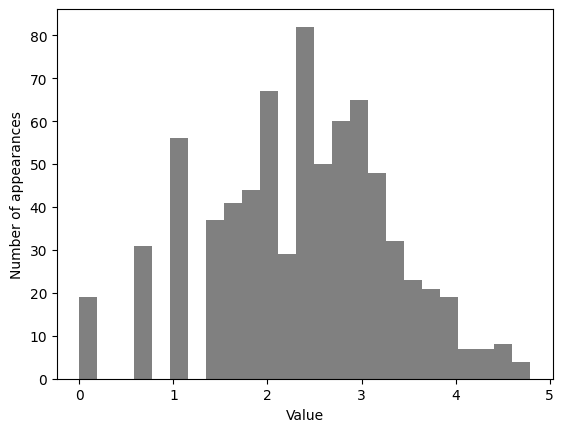

In [14]:
plt.hist(X_train_log[:, 0], bins=25, color='gray')
plt.ylabel("Number of appearances")
plt.xlabel("Value")

In [15]:
score = Ridge().fit(X_train_log, y_train).score(X_test_log, y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.875
